# Introduction

# Technical Setup

## Python

In [1]:
#data processing
import numpy as np
import pandas as pd
import os
import datetime
import math
import functools
from datetime import datetime
import scipy.stats as stats
from scipy.stats import pointbiserialr

import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import sys
sys.path.append(r"D:\Project\rpy2_testing\src")
import my_utils

import warnings
warnings.filterwarnings('ignore')

## R

In [2]:
os.environ['R_HOME'] = 'C:/Program Files/R/R-4.3.1'  

In [3]:
# import rpy2's package module
from rpy2.robjects.packages import importr
from functools import partial
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
from rpy2.ipython import html
html.html_rdataframe=partial(html.html_rdataframe, table_class="docutils")

c:\Users\ramdh\anaconda3\envs\rpy2_env\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [49]:
#RUn to install R packages if not installed yet
utils = importr('utils')
base = importr('base')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1) # select the first mirror in the list

# R package names
packnames = ('ltm', 'report')


# Selectively install what needs to be install.
names_to_install = [x for x in packnames if not rpackages.isinstalled(x)]
if len(names_to_install) > 0:
    utils.install_packages(StrVector(names_to_install))

R[write to console]: Installing package into 'C:/Users/ramdh/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

R[write to console]: also installing the dependency 'msm'


R[write to console]: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.3/msm_1.7.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 1455139 bytes (1.4 MB)

R[write to console]: downloaded 1.4 MB


R[write to console]: trying URL 'https://cloud.r-project.org/bin/windows/contrib/4.3/ltm_1.2-0.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 757462 bytes (739 KB)

R[write to console]: downloaded 739 KB




package 'msm' successfully unpacked and MD5 sums checked
package 'ltm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ramdh\AppData\Local\Temp\RtmpIV5lnn\downloaded_packages


In [4]:
%load_ext rpy2.ipython

In [50]:
%%R
library(dplyr)
library(ggplot2)
library(ggstatsplot)
library(fitdistrplus)
library(gridExtra)
library(kableExtra)
library(ggthemr)
library(ggpubr)
library(polycor)
library(ltm)

Loading required package: msm


# Data Collection

In [6]:
df_raw = pd.read_csv('data\marketing_campaign.csv', sep='\t')

In [7]:
my_utils.dataframe_info(df_raw)

,Column,Data Type,Unique Count,Unique Sample,Missing Values,Missing Percentage
0,ID,int64,2240,"[5524, 2174, 4141, 6182, 5324]",0,0.0000
1,Year_Birth,int64,59,"[1957, 1954, 1965, 1984, 1981]",0,0.0000
2,Education,object,5,"[Graduation, PhD, Master, Basic, 2n Cycle]",0,0.0000
3,Marital_Status,object,8,"[Single, Together, Married, Divorced, Widow]",0,0.0000
4,Income,float64,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0]",24,1.0714
5,Kidhome,int64,3,"[0, 1, 2]",0,0.0000
6,Teenhome,int64,3,"[0, 1, 2]",0,0.0000
7,Dt_Customer,object,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201...",0,0.0000
8,Recency,int64,100,"[58, 38, 26, 94, 16]",0,0.0000
9,MntWines,int64,776,"[635, 11, 426, 173, 520]",0,0.0000


This dataset contains 29 variables, consisting of integers (int64), floating points (float64), and objects (object). 

- **ID**: A unique identifier for each customer. This feature may not contribute to a predictive model.

- **Year_Birth**: The birth year of customers, which can be converted to 'Age'.

- **Education** and **Marital_Status**: Categorical features that may require one-hot encoding.

- **Income**: A continuous feature indicating customer's income, with some missing values that need to be filled.

- **Kidhome** and **Teenhome**: Integer variables indicating the number of children in the household.

- **Dt_Customer**: The joining date of customers, which may need to be converted to 'tenure' or similar measure.

- **Recency**: Indicates how recently a customer made a purchase. Further context is needed for proper interpretation.

- **MntX** and **NumXPurchases**: Represent the amount spent on different categories of products and the number of purchases made through different channels, respectively.

- **AcceptedCmpX**: Binary features indicating whether the customer accepted offers in different campaigns.

- **Complain**: A binary feature indicating if the customer made a complaint recently.

- **Z_CostContact** and **Z_Revenue**: Features with no variance, hence can be removed.

- **Response**: The binary target variable indicating whether a customer accepted the latest offer.

Preprocessing will depend on the final model chosen and can involve scaling, encoding, or dropping some features.


# Data Preprocessing & Cleaning

This phase of the data analysis project focuses on enhancing the quality of the dataset for further stages, which include exploratory data analysis, model building, and interpretation. 

Notes on processing that need to be done are as follows:

1. **Removal of Unnecessary Features**: Features such as 'ID', 'Z_CostContact', and 'Z_Revenue', which do not contribute significant insights for further analysis, are eliminated. 'ID' is merely a distinct identifier, while 'Z_CostContact' and 'Z_Revenue' do not display variability, making them uninformative for a predictive model.

2. **Handling Missing Values**: The 'Income' feature contains missing values, which require attention. Depending on the shape of the distribution, these missing values will be addressed using either its mean or median imputation. 

3. **Derivation of New Features**: New features, 'Age', 'Customer_Tenure', and 'Generation', are engineered from existing ones. 'Age' is calculated by subtracting the 'Year_Birth' from the current year. 'Customer_Tenure' reflects the customer's length of association with the store and is computed from the 'Dt_Customer' feature. The 'Generation' is determined based on the 'Age' feature and the definitions provided by Pew Research Centre. `Total_Purchases` and `Total_Spending` are calculated from `NumXPurchase` and `MntX` respectively.

4. **Encoding of Categorical Variables**: Categorical variables, namely 'Education' and 'Marital_Status', are encoded into a format suitable for machine learning algorithms. One-hot encoding is a suitable method for this purpose.

5. **Scaling of Numeric Features**: The features 'Income', 'Recency', 'MntX', and 'NumXPurchases' exist in different scales. To ensure that no single feature dominates the model. Scaling methods will be implemented later on as pipelines during experimentation since some machine learning models such as XGBoost and Catboost don't require feature scaling. This will be tested during the experimentation later on.

6. **Detection and Treatment of Outliers**: Outliers in features such as 'Income', 'Recency', 'MntX', and 'NumXPurchases' can significantly bias the model. Therefore, outlier detection and subsequent treatment, through methods like Z-score or the Interquartile Range (IQR) method, are employed.

**footnotes**:
> The 'Generation' feature is classified as per the definitions given by the Pew Research Centre:
>
> - The Silent Generation: Born 1928-1945 (76-93 years old)
> - Baby Boomers: Born 1946-1964 (57-75 years old)
> - Generation X: Born 1965-1980 (41-56 years old)
> - Millennials: Born 1981-1996 (25-40 years old)
> - Generation Z: Born 1997-2012 (9-24 years old)
> - Generation Alpha: Born 2010-2025 (0-11 years old)

## Unnecesary Features Removal, Missing Value Handling, and New Features Generation

In [27]:
df = df_raw.copy(deep=True)

# 1. Redundant Features Removal
df = df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

# 2. Missing Values Handling
df['Income'] = df['Income'].fillna(df['Income'].median())

# 3. New Features Derivation
# Calculate Age from Year_Birth
current_year = datetime.now().year
df['Age'] = current_year - df['Year_Birth']
df = df.drop('Year_Birth', axis=1)

# Calculate Total Purchase
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

# Calculate Customer_Tenure
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
last_recorded_date = df['Dt_Customer'].max()
df['Customer_Tenure'] = (last_recorded_date - df['Dt_Customer']).dt.days

# Calculate Total Spending
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[product_columns].sum(axis=1)

# Create Living_With feature based on Kidhome and Teenhome
conditions = [
    (df['Kidhome'] == 1) & (df['Teenhome'] == 0),
    (df['Kidhome'] == 0) & (df['Teenhome'] == 1),
    (df['Kidhome'] == 1) & (df['Teenhome'] == 1),
]
choices = ['With_Kids', 'With_Teens', 'With_Kids_and_Teens']
df['Living_With'] = np.select(conditions, choices, default='Alone')

# Create Is_Parent feature
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome']).apply(lambda x: 1 if x > 0 else 0)

# Define generations
conditions = [
    (df['Age'] >= 76) & (df['Age'] <= 93),
    (df['Age'] >= 57) & (df['Age'] <= 75),
    (df['Age'] >= 41) & (df['Age'] <= 56),
    (df['Age'] >= 25) & (df['Age'] <= 40),
    (df['Age'] >= 9) & (df['Age'] <= 24),
    (df['Age'] >= 0) & (df['Age'] <= 11),
]
choices = ['Silent_Generation', 'Baby_Boomers', 'Generation_X', 'Millennials', 'Generation_Z', 'Generation_Alpha']
df['Generation'] = np.select(conditions, choices, default='Unknown')

## Outlier Detection

In [11]:
num_df = df.select_dtypes(include=np.number)
nunique_df = pd.DataFrame(data=num_df.apply(pd.Series.nunique), columns=['nunique']).rename_axis('variables')
selection = nunique_df[nunique_df['nunique'] > 5].index

#plotly frame setup
to_plot = num_df[selection]

# number of variables to plot
num_vars = len(to_plot.columns)

# calculate number of rows and columns for the subplot grid
plot_nrows = int(np.ceil(num_vars / 4))

# create subplot titles
subplot_titles = list(to_plot.columns) + [''] * (plot_nrows * 4 - num_vars) 

# create subplots
fig = make_subplots(rows=plot_nrows, cols=4, subplot_titles=tuple(subplot_titles))

# add traces
for i, col_name in enumerate(to_plot.columns):
    row = i // 4 + 1
    col = i % 4 + 1
    fig.add_trace(go.Box(y=to_plot[col_name], name=col_name), row=row, col=col)

fig.update_layout(height=1400, width=1200, showlegend=False, template='plotly_dark', title='Boxplot of Numerical Features')
fig.update_xaxes(visible=False, showticklabels=False)

fig.show()


<img src="figures/boxplots.png" width="90%" /> 

**Highlights**

The boxplot above shows that tere are possible outliers on the following features:
- Income, MntFruits, MntMeatProducts, MntSweetProducts, MntGoldProds, MntFishProducts, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumWebVisitsMonth, Age, and TotalSpent

Before deciding wether outliers found should be remove, let's calculate how many percentage of the data are considered as outliers by the Inter-quartile Range method used by the boxplot

In [12]:
#count outliers
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3-Q1


#outlier dataframe
outlier_count = ((num_df < (Q1-1.5*IQR)) | (num_df > (Q3 + 1.5*IQR))).sum() #outlier count 
outlier_df = pd.DataFrame(outlier_count, columns=['outlier_count']).rename_axis('variable')
outlier_df['percentage'] = outlier_df['outlier_count']/len(num_df)*100 #outlier percentage columns


pd.set_option('display.precision', 2)
outlier_df.sort_values('outlier_count', ascending=False).style.background_gradient(cmap='gist_heat').set_caption('Outlier Count')

,outlier_count,percentage
variable,,
Response,334,14.910714
MntSweetProducts,248,11.071429
MntFruits,227,10.133929
MntFishProducts,223,9.955357
MntGoldProds,207,9.241071
MntMeatProducts,175,7.812500
AcceptedCmp4,167,7.455357
AcceptedCmp3,163,7.276786
AcceptedCmp5,163,7.276786


The table above presents the number of data points identified as outliers via the Interquartile Range (IQR) method for each variable. Additionally, the percentage of outliers in relation to the overall observations is displayed in the second column.

A significant percentage of data labeled as outliers is noticed in several variables. Such outliers may not indeed be outliers but could be representative of the inherent variability within the population parameter for each respective variable. Therefore, caution is advised before deciding to remove these outliers.

Therefore, instead of a blanket removal, a more selective approach will be adopted. Outliers will be defined as those data points where the distance from the nearest data point is significantly large. An example of this can be seen in the 'MntMeatProducts' variable, where values ranging from 1582 to 1725 are significantly distant from the next lower value of 984. This approach will be uniformly applied to all variables.

In [28]:
#filter multiple conditions
def conjunction(*conditions):
  return functools.reduce(np.logical_and, conditions)

cond1 = df.Age < 90
cond2 = df.Income < 150000
cond3 = df.NumCatalogPurchases < 11
cond4 = df.NumWebVisitsMonth < 13
cond5 = df.NumWebPurchases < 20
cond6 = df.MntSweetProducts < 200
cond7 = df.MntMeatProducts < 1500
cond8 = df.MntGoldProds < 290

df = df[conjunction(cond1, cond2, cond3, cond4, cond5, cond6, cond7, cond8)]
print("Number of data points before outlier removal:", len(df_raw))
print("Number of data points after outlier removal:", len(df))
print("Percentage of data points removed: {:.2f}%".format((len(df_raw) - len(df)) / len(df_raw) * 100))

Number of data points before outlier removal: 2240
Number of data points after outlier removal: 2195
Percentage of data points removed: 2.01%


Several conditional filters were applied on the features Age, Income, NumCatalogPurchases, NumWebVisitsMonth, NumWebPurchases, MntSweetProducts, MntMeatProducts, and MntGoldProds to detect and remove outliers. Each condition was defined to exclude values beyond a certain threshold, which was determined based on the data exploration and boxplot visualization.

Upon applying all the conditions simultaneously on the data, the outliers were effectively removed. The number of observations after this process is 2195, which means 45 data points were identified as outliers and excluded from the dataset.

In terms of percentage, approximately 2.01% of the original data was removed during this outlier treatment process. The removal of these outliers should improve the overall quality of the data and potentially enhance the performance of any subsequent model training and predictions.

# 3. Exploratory Data Analysis

## 3.1 Identifying Influential Factors in Customer Responses

For optimizing marketing strategies, understanding the factor that can influence customer's likelihood of accepting offers is paramount. The relationships between customer attributes and their responses to the last campaign have been explored.

It's crucial to emphasize the importance of relative values in our analysis, as they allow for effective comparisons that can pinpoint which factors warrant the most effective comparison for optimizing marketing strategy. 

The findings are as follows:

In [82]:
# List of numerical columns
numerical_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                  'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Total_Purchases', 
                  'Customer_Tenure', 'Total_Spending']

# Initialize an empty dictionary to hold column names, their correlation with 'Response' and p-value
correlation_dict = {}

# Loop through the numerical columns and compute Point Biserial Correlation
for col in numerical_cols:
    correlation, p_value = pointbiserialr(df['Response'], df[col])
    correlation_dict[col] = {'Correlation': correlation, 'P_value': p_value}

# Convert the dictionary to a DataFrame
correlation_df = pd.DataFrame(correlation_dict).T.reset_index().rename(columns={'index':'Variable'})

correlation_df.sort_values('Correlation', ascending=False).style.\
    background_gradient(subset=['Correlation'], cmap='gist_heat').\
        set_caption('Point-Biserial Correlation')

,Variable,Correlation,P_value
18,Total_Spending,0.256426,0.000000
6,MntMeatProducts,0.243658,0.000000
4,MntWines,0.235974,0.000000
12,NumCatalogPurchases,0.228098,0.000000
17,Customer_Tenure,0.196252,0.000000
0,Income,0.163569,0.000000
11,NumWebPurchases,0.156850,0.000000
16,Total_Purchases,0.150160,0.000000
9,MntGoldProds,0.145443,0.000000
8,MntSweetProducts,0.113166,0.000000


The figures can be interpreted as such:

**Possitively correlated with Response**
- The strongest positive correlation has been found with Total_Spending (p-value < 0.05). This statistically significant finding suggests that a higher likelihood of accepting the latest offers is associated with customers who have spent more.
- A similar positive trend is seen with MntMeatProducts and MntWines (both p-values < 0.05), indicating a higher tendency to respond positively to campaigns among customers with higher expenditures on meat products and wines than those who spend high on other product categories.

**Negatively correlated with Response (Inverse Relationship)**

- Conversely, `Recency`, or the recency of a customer's last purchase, shows a negative correlation (p-value < 0.05). This suggests that the more recent a purchase made by a customer, the less likely they are to accept new offers. This could be interpreted as recent buyers still being satisfied with their purchases and possibly not being in the market for more, even when a new offer is presented.

**No significant correlation with Response**
- Interestingly, no significant influence on the decision to accept the latest offers is detected from the number of purchases a customer made with a discount (NumDealsPurchases). This may suggest that discounts are not the primary motivator for these customers or that some improvements need to be made on discount offering strategy.This finding is also statistically significant.

To assess the relationship between the categorical variables in the dataset and the customer's response to the latest campaign (Response), both a Chi-square test of independence and Cramér's V were conducted.

- The Chi-square statistic and its associated p-value evaluate the statistical significance of the observed relationship, with the p-value providing the probability of obtaining the observed data if no relationship actually exists in the population. 

- Cramér's V provides a measure of the strength of association between two categorical variables, taking values from 0 (indicating no association) to 1 (indicating perfect association).


In [398]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))    
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

def chi2_and_cramers_v(df, target, variables):
    results = []
    for var in variables:
        contingency_table = pd.crosstab(df[target], df[var])
        chi2, p, _, _ = stats.chi2_contingency(contingency_table)
        v = cramers_v(df[var], df[target])
        results.append([var, chi2, p, v])

    results_df = pd.DataFrame(results, columns=['Variable', 'Chi-square statistic', 'P-value', 'Cramers_V'])
    results_df = results_df.sort_values(by='Cramers_V', ascending=False)
    return results_df

categorical_cols = ['Education', 'Marital_Status', 'Generation', 'AcceptedCmp1', 'AcceptedCmp2', 
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Living_With', 'Is_Parent']

results_df = chi2_and_cramers_v(df, target='Response', variables=categorical_cols)

In [399]:
results_df

,Variable,Chi-square statistic,P-value,Cramers_V
7,AcceptedCmp5,213.03,3.00e-48,0.31
3,AcceptedCmp1,170.52,5.71e-39,0.28
5,AcceptedCmp3,135.74,2.27e-31,0.25
10,Is_Parent,87.72,7.53e-21,0.20
6,AcceptedCmp4,70.43,4.77e-17,0.18
9,Living_With,71.29,2.26e-15,0.18
4,AcceptedCmp2,60.75,6.48e-15,0.17
1,Marital_Status,56.38,7.95e-10,0.15
0,Education,25.12,4.76e-05,0.10
2,Generation,8.95,3.00e-02,0.05


The results of the combined analysis using the Chi-square test of independence and Cramér's V statistic are as follows:

- **AcceptedCmp5, AcceptedCmp1, and AcceptedCmp3:** These variables related to the acceptance of offers in previous campaigns showed the strongest associations with the latest campaign response. Their high Chi-square values and almost zero p-values indicated statistically significant relationships, while their Cramér's V values (0.31, 0.28, and 0.25 respectively) suggested a moderate strength of association. This implies that previous acceptances of campaign offers have a significant influence on the likelihood of accepting future campaigns. Thus, focusing on such customers could greatly enhance the success rates of future campaigns.

- **Is_Parent:** With a Cramér's V value of 0.20, this variable displayed a significant yet weaker association with the campaign response. This suggests that being a parent might influence the decision to accept the offer, indicating that campaigns specifically designed for parents could yield higher response rates.

- **AcceptedCmp4, Living_With, and AcceptedCmp2:** Although these variables had weaker associations with the campaign response (Cramér's V = 0.18, 0.18, and 0.17 respectively), they were statistically significant, indicating their potential influence on the outcome. Therefore, these variables should not be disregarded in campaign design.

- **Marital_Status and Education:** These variables exhibited weaker associations with the campaign response (Cramér's V = 0.15 and 0.10 respectively). However, their statistical significance suggests that they might subtly influence customer behavior. Thus, campaign designs that consider different marital statuses and education levels might lead to modest improvements in response rates.

- **Generation:** Despite its weak association with campaign responses (Cramér's V = 0.05), the 'Generation' variable is statistically significant, indicating that generational categories could subtly impact response rates. This also underlines the importance of appropriate data categorization - while the 'Age' variable as a standalone factor didn't demonstrate statistical significance, segmenting it into 'Generation' has revealed potential behavioral insights.

- **Complain:** There was no significant association between this variable and the campaign response (Cramér's V = 0.00). This suggests that a customer's complaint history does not appear to significantly impact their decision to accept the offer in the latest campaign. As a result, it may not be necessary to prioritize this variable in the context of campaign design.

## Enhancing Statistical Significance: Variable Grouping Analysis

The successful grouping of the 'Age' variable, which contributed to significant statistical results, serves as the inspiration to apply similar treatment to other numerical variables. Particularly, the variables that did not previously demonstrate statistical significance, such as 'NumStorePurchases', 'NumDealsPurchases', and 'NumWebVisitsMonth', will be targeted. Furthermore, other numerical variables with sufficient unique values will also be grouped.

Discretization by quartiles has been selected as the chosen grouping technique due to its robustness in handling outliers and skewness, its ability to transform numerical data into categorical while preserving the distribution properties, and the interpretability it offers by dividing the data into quartiles representing different levels of the variable. 

In [404]:
def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorial-categorial association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def dicretize_stats_test(df, variable_name, target_name, min_quartiles=2, max_quartiles=21):
    """Perform a chi-square test and calculate Cramér's V for a variable discretized into different numbers of quartiles."""
    
    # Initialize an empty list to store the results
    test_results = []

    # Loop through different numbers of quartiles
    for quartiles in range(min_quartiles, max_quartiles): 
        # Discretize the variable into quartiles
        variable_quartiles = pd.qcut(df[variable_name], quartiles, labels=False, duplicates='drop')

        # Create a contingency table
        contingency_table = pd.crosstab(df[target_name], variable_quartiles)

        # Perform the chi-square test
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Compute Cramer's V
        v = cramers_v(df[target_name], variable_quartiles)

        # Append the results to the list
        test_results.append([f'{variable_name}_{quartiles}', chi2, p, v])

    # Convert the list to a DataFrame
    test_results_df = pd.DataFrame(test_results, columns=['Variable', 'Chi-square statistic', 'P-value', 'Cramers_V'])

    # Sort the DataFrame by the chi-square statistic in descending order
    test_results_df = test_results_df.sort_values('Chi-square statistic', ascending=False)

    return test_results_df


In [407]:
dicretize_stats_test(df, 'NumStorePurchases', 'Response', min_quartiles=2, max_quartiles=15)

,Variable,Chi-square statistic,P-value,Cramers_V
8,NumStorePurchases_10,27.48,2.74e-04,0.10
7,NumStorePurchases_9,27.46,1.19e-04,0.10
9,NumStorePurchases_11,27.15,3.14e-04,0.10
10,NumStorePurchases_12,26.93,7.27e-04,0.09
11,NumStorePurchases_13,26.93,7.27e-04,0.09
12,NumStorePurchases_14,26.90,7.37e-04,0.09
4,NumStorePurchases_6,26.28,7.87e-05,0.10
3,NumStorePurchases_5,24.83,5.45e-05,0.10
6,NumStorePurchases_8,24.74,3.82e-04,0.09
5,NumStorePurchases_7,23.95,2.22e-04,0.09


The `NumStorePurchases` variable is best segmented into 6 categories (discretize by 6 quartiles). Here's why:

- The statistical significance (p-value: 7.87e-05) is high, showing a meaningful relationship with campaign responses.
- The association strength (Cramér's V: 0.10) is similar across different segmentations.
- A 6-category split balances useful insights with easy comprehension for decision-makers.

This can guide strategies by highlighting how in-store purchases can affect campaign responses.


In [409]:
dicretize_stats_test(df, 'NumWebVisitsMonth', 'Response', min_quartiles=2, max_quartiles=15)

,Variable,Chi-square statistic,P-value,Cramers_V
7,NumWebVisitsMonth_9,46.63,6.58e-08,0.13
8,NumWebVisitsMonth_10,46.63,6.58e-08,0.13
9,NumWebVisitsMonth_11,46.63,6.58e-08,0.13
10,NumWebVisitsMonth_12,46.63,6.58e-08,0.13
11,NumWebVisitsMonth_13,46.63,6.58e-08,0.13
12,NumWebVisitsMonth_14,46.63,6.58e-08,0.13
5,NumWebVisitsMonth_7,45.49,3.74e-08,0.13
6,NumWebVisitsMonth_8,45.49,3.74e-08,0.13
4,NumWebVisitsMonth_6,42.01,5.86e-08,0.13
3,NumWebVisitsMonth_5,26.50,2.51e-05,0.10


For `NumWebVisitsMonth`, segmenting into 7 categories proves to be an effective choice. Here's the rationale:

- High statistical significance (p-value: 3.74e-08) indicates a robust relationship with campaign responses.
- The strength of association (Cramér's V: 0.13) is consistently strong across different segmentations.
- A 7-category split balances comprehensive insights with ease of understanding for non-technical stakeholders.

This provides valuable insight into how the frequency of website visits in a month influences campaign responses, informing future online engagement strategies.

In [408]:
dicretize_stats_test(df, 'NumDealsPurchases', 'Response', min_quartiles=2, max_quartiles=15)

,Variable,Chi-square statistic,P-value,Cramers_V
9,NumDealsPurchases_11,19.76,1.39e-03,0.08
10,NumDealsPurchases_12,19.76,1.39e-03,0.08
11,NumDealsPurchases_13,19.76,1.39e-03,0.08
12,NumDealsPurchases_14,19.76,1.39e-03,0.08
8,NumDealsPurchases_10,19.30,6.85e-04,0.08
5,NumDealsPurchases_7,19.15,7.33e-04,0.08
6,NumDealsPurchases_8,19.15,7.33e-04,0.08
7,NumDealsPurchases_9,19.15,7.33e-04,0.08
4,NumDealsPurchases_6,19.03,2.70e-04,0.09
2,NumDealsPurchases_4,16.89,7.46e-04,0.08


In the case of `NumDealsPurchases`, our analysis suggests a relatively weak relationship with campaign responses:

- Across all levels of segmentation, the association (Cramér's V) stays consistently around 0.08, indicating a weak link with the campaign's outcome.
- The p-values are significant, suggesting a statistically noteworthy relationship. However, their values are larger than those of previously discussed variables, hinting at a weaker effect.
- Segmenting `NumDealsPurchases` into 6 categories seems to be the optimal choice, as it strikes a balance between insights and interpretability while preserving a reasonable level of statistical significance (p-value: 2.70e-04).

Although the relationship is weak, it should not be disregarded. The frequency of deal purchases may offer a minor yet valuable hint on customer behavior and preferences that can guide the design of future campaigns.

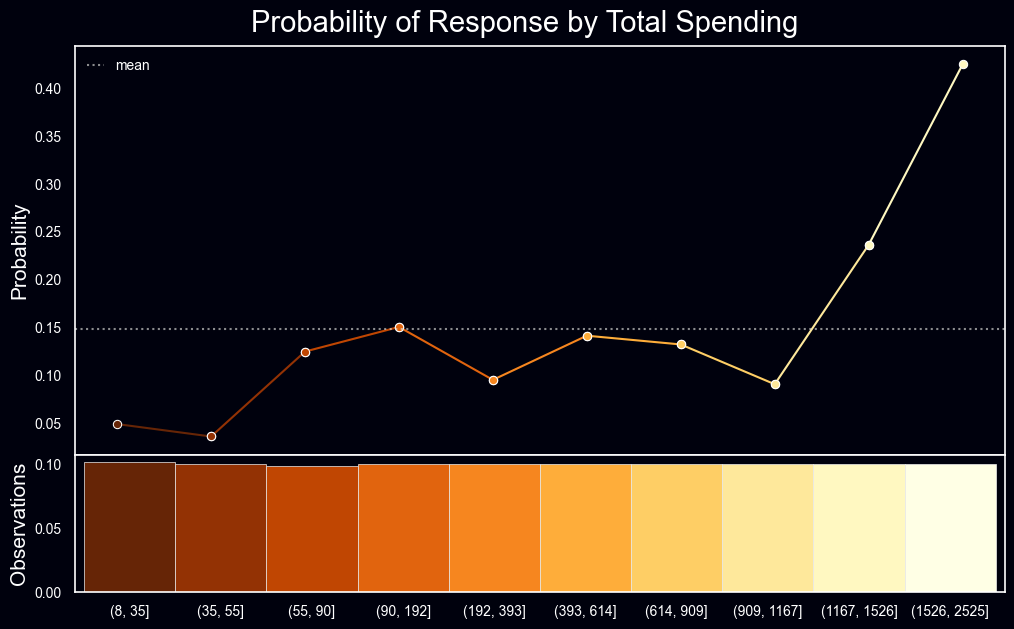

In [386]:
plot_prob_progression(df['NumStorePurchases'],
                      df['Response'],
                      x_intervals=6, use_quartiles=True,  mean_line=True,
                      title='Probability of Response by NumStorePurchases')

In [385]:
df['Recency_Grp'] = pd.qcut(df['Recency'], q=7, labels=None)

df['Total_Spending_Grp'] = pd.qcut(df['Total_Spending'], q=7, labels=None)

df['Income_Grp'] = pd.qcut(df['Income'], q=7, labels=None)
df['Log_Income_Grp'] = pd.qcut(df['Log_Income'], q=10, labels=None)


df['Age_Grp'] = pd.qcut(df['Age'], q=7, labels=None)

df['NumStorePurchases_Grp'] = pd.qcut(df['NumStorePurchases'], q=6, labels=None)

df['NumDealsPurchases_Grp'] = pd.qcut(df['NumDealsPurchases'], q=4, labels=None)

df['NumWebVisitsMonth_Grp'] = pd.qcut(df['NumWebVisitsMonth'], q=7, labels=None)


categorical_cols = ['Education', 'Marital_Status', 'Generation', 'AcceptedCmp1', 'AcceptedCmp2', 
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Living_With', 'Is_Parent', 
                    'Recency_Grp', 'Total_Spending_Grp', 'Age_Grp', 'NumStorePurchases_Grp', 'NumDealsPurchases_Grp', 'NumWebVisitsMonth_Grp',
                    'Income_Grp', 'Log_Income_Grp']

# Initialize an empty list to hold column names, their test statistic, p-value and degrees of freedom
chi2_results = []

# Loop through the categorical columns and perform Chi-Square test
for col in categorical_cols:
    contingency_table = pd.crosstab(df['Response'], df[col])
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    chi2_results.append([col, chi2, p])

# Convert the list to a DataFrame
chi2_df = pd.DataFrame(chi2_results, columns=['Variable', 'Chi-square statistic', 'P-value'])

chi2_df.sort_values('Chi-square statistic', ascending=False)

,Variable,Chi-square statistic,P-value
7,AcceptedCmp5,213.03,3.00e-48
3,AcceptedCmp1,170.52,5.71e-39
12,Total_Spending_Grp,153.40,1.48e-30
5,AcceptedCmp3,135.74,2.27e-31
18,Log_Income_Grp,130.11,1.12e-23
17,Income_Grp,111.82,8.46e-22
11,Recency_Grp,105.65,1.66e-20
10,Is_Parent,87.72,7.53e-21
9,Living_With,71.29,2.26e-15
6,AcceptedCmp4,70.43,4.77e-17


The Chi-square test reveals a shift in significance for certain variables after applying our grouping technique. Notably, 'NumStorePurchases', 'NumDealsPurchases', and 'NumWebVisitsMonth' showed greater statistical relevance in predicting customer behavior.

- 'NumStorePurchases' initially had a weak correlation of 0.031110 and a high p-value of 0.1450. After grouping, it demonstrated strong statistical significance, with a Chi-square statistic of 26.28 and a p-value of 7.87e-05. 

- 'NumDealsPurchases', with an original correlation of 0.00987 and a high p-value of 0.644, significantly improved its statistical relevance post-grouping, with a Chi-square statistic of 16.89 and a p-value of 7.46e-04. 

- 'NumWebVisitsMonth', initially weakly linked with customer responses (correlation of 0.00769 and a high p-value of 0.719), showed marked improvements after grouping. The Chi-square statistic rose to 45.49, and the p-value dropped to 3.74e-08.

- Other variables maintained statistical significance post-grouping. This result indicates that the categorization process preserves the predictive power of these variables, demonstrating the robustness of our approach.

Overall, the categorized view of these behavior metrics implies a better comprehension of the customer's reaction to deals and their interaction with the website. This suggests that tailoring marketing strategies around these categorized behaviors could potentially drive better likelihood of getting positive response. 

## Total Spending vs Response

In [371]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import ticker as plticker
from matplotlib import ticker
import seaborn as sns
import matplotlib as mpl



def discretize(v, v_intervals, use_quartiles=False, use_continuous_bins=False):
    if isinstance(v, (pd.core.series.Series, np.ndarray)) and isinstance(v_intervals, (list, np.ndarray)) and len(np.unique(v)) != len(v_intervals):
        raise Exception("length of interval must match unique items in array")

    if isinstance(v, (str)) and isinstance(v_intervals, (list, np.ndarray)):
        #name of variable instead of array and list of intervals used
        if isinstance(v_intervals, list): v_intervals = np.array(v_intervals)
        return v, v_intervals

    if (np.isin(v.dtype, [int, float, 'int8', 'int16', 'int32', 'float16', 'float32'])) and (isinstance(v_intervals, (int))) and (len(np.unique(v)) >= v_intervals) and (max(v) > min(v)):
        #v is discretizable, otherwise assumed to be already discretized
        if use_continuous_bins:
            if use_quartiles:
                v, bins = pd.qcut(v, v_intervals, duplicates='drop', retbins=True, labels=True, precision=2)
            else:
                v, bins = pd.cut(v, v_intervals, duplicates='drop', retbins=True, labels=True, precision=2)
        else:
            if use_quartiles:
                v = pd.qcut(v, v_intervals, duplicates='drop', precision=2)
            else:
                v = pd.cut(v, v_intervals, duplicates='drop', precision=2)

    if np.isin(v.dtype, [object, 'category']):
        if not isinstance(v, (pd.core.series.Series)):
            v = pd.Series(v)
        bins = np.sort(np.unique(v)).astype(str)
        v = v.astype(str)
        bin_dict = {bins[i]:i for i in range(len(bins))}
        v = v.replace(bin_dict)
    else:
        bins = np.unique(v)

    if isinstance(v_intervals, (list, np.ndarray)) and len(bins) == len(v_intervals):
        bins = v_intervals

    return v, bins

def plot_prob_progression(x, y, x_intervals=7, use_quartiles=False,\
                          xlabel=None, ylabel=None, title=None, text=None, model=None, X_df=None, x_col=None,\
                         mean_line=False, figsize=(12,6), x_margin=0.01, color='Reds'):
    x = x.astype(int)
    y = y.astype(int)
    if isinstance(x, list): x = np.array(x)
    if isinstance(y, list): y = np.array(y)
    if (not isinstance(x, (str, pd.core.series.Series, np.ndarray))) or (not isinstance(y, (str, pd.core.series.Series, np.ndarray))):
        raise Exception("x and y must be either lists, pandas series or numpy arrays. x can be string when dataset is provided seperately")
    if (isinstance(x, (pd.core.series.Series, np.ndarray)) and (len(x.shape) != 1)) or ((isinstance(y, (pd.core.series.Series, np.ndarray))) and (len(y.shape) != 1)):
        raise Exception("x and y must have a single dimension")
    if (isinstance(x_intervals, (int)) and (x_intervals < 2)) or (isinstance(x_intervals, (list, np.ndarray)) and (len(x_intervals) < 2)):
        raise Exception("there must be at least two intervals to plot")
    if not np.isin(y.dtype, [int, float, 'int8', 'int16', 'int32', 'float16', 'float32']):
        raise Exception("y dimension must be a list, pandas series or numpy array of integers or floats")
    if max(y) == min(y):
        raise Exception("y dimension must have at least two values")
    elif len(np.unique(y)) == 2 and ((max(y) != 1) or (min(y) != 0)):
        raise Exception("y dimension if has two values must have a max of exactly 1 and min of exactly zero")
    elif len(np.unique(y)) > 2 and ((max(y) <= 1) or (min(y) >= 0)):
        raise Exception("y dimension if has more than two values must have range between between 0-1")
    x_use_continuous_bins = (model is not None) and (isinstance(x_intervals, (list, np.ndarray)))
    x, x_bins = discretize(x, x_intervals, use_quartiles, x_use_continuous_bins)
    x_range = [*range(len(x_bins))]
    plot_df = pd.DataFrame({'x':x_range})
    if (model is not None) and (X_df is not None) and (x_col is not None):
        preds = model.predict(X_df).squeeze()
        if len(np.unique(preds)) <= 2:
            preds = model.predict_proba(X_df)[:,1]
        x_, _ = discretize(X_df[x_col], x_intervals, use_quartiles, x_use_continuous_bins)
        xy_df = pd.DataFrame({'x':x_, 'y':preds})
    else:
        xy_df = pd.DataFrame({'x':x,'y':y})
    probs_df = xy_df.groupby(['x']).mean().reset_index()
    probs_df = pd.merge(plot_df, probs_df, how='left', on='x').fillna(0)

    x_bin_cnt = len(x_bins)
    l_width = 0.933
    r_width = 0.05
    w, h = figsize
    wp = (w-l_width-r_width)/9.27356902357
    xh_margin = ((wp-(x_margin*2))/(x_bin_cnt*2))+x_margin
    fig, (ax0, ax1) = plt.subplots(2, 1, figsize=figsize,\
                                   gridspec_kw={'height_ratios': [3, 1]})
    if title is not None:
        fig.suptitle(title, fontsize=21)
        ax0.text(0.61, 0.85, text,
                 horizontalalignment='left', verticalalignment='top', transform=ax0.transAxes, fontsize=9, fontstyle='italic')
        plt.subplots_adjust(top = 0.92, bottom=0.01, hspace=0.001, wspace=0.001)
    else:
        plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.001, wspace=0.001)

    ax0.minorticks_on()
    # Disable grid for ax0
    ax0.grid(False)
    cmap = mpl.colormaps[color]
    num_segments = len(probs_df['y']) - 1

    for i in range(num_segments):
        segment = probs_df.iloc[i:i+2]
        color = cmap(i / num_segments)
        sns.lineplot(data=segment, x='x', y='y', marker='o', color=color, ax=ax0)

    # sns.lineplot(data=probs_df, x='x', y='y', marker='o', ax=ax0)
    ax0.set_ylabel('Probability', fontsize=15)
    ax0.set_xlabel('')

    if mean_line:
        ax0.axhline(y=xy_df.y.mean(), c='#E9EAE5', alpha=0.6, linestyle='dotted', label="mean")
        ax0.legend()

    
    colors = [cmap(i) for i in np.linspace(0, 1, len(x_bins))]

    # Disable grid for ax1
    ax1.grid(False)

    hist = sns.histplot(xy_df, x="x", stat='probability', bins=np.arange(x_bin_cnt+1)-0.5, ax=ax1)
    # color the bars using the color map
    for patch, color in zip(hist.patches, colors):
        patch.set_facecolor(color) # color depends on the index of the bar
    ax1.set_ylabel('Observations', fontsize=15)
    ax1.set_xlabel(xlabel, fontsize=15)
    ax1.xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
    ax1.set_xticklabels(['']+['(' + str(round(float(i.split(',')[0][1:]))) + ', ' + str(round(float(i.split(',')[1][:-1]))) + ']' for i in x_bins])
    ax1.margins(x=x_margin)
    plt.show()

plt.style.use('ggplot')
sns.set_style({'axes.grid' : False})

plt.rcParams.update({
    'axes.facecolor': '#00010D',
    'figure.facecolor': '#00010D',
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.edgecolor': 'white',
    'axes.linewidth': 1.2,
    'axes.titlecolor': 'white',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.edgecolor': 'white',
    'legend.frameon': False,
    'legend.fontsize': 10,
    'legend.handlelength': 1.2,
    'legend.handleheight': 0.5
})

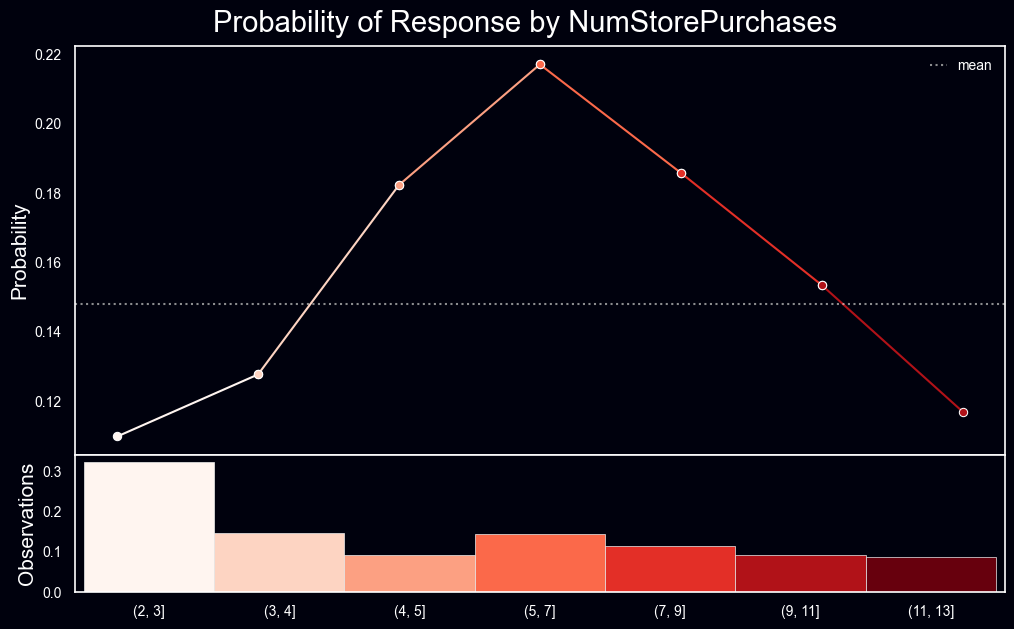

In [387]:
plot_prob_progression(df['NumStorePurchases'],
                      df['Response'],
                      x_intervals=9, use_quartiles=True,  mean_line=True,
                      title='Probability of Response by NumStorePurchases')

In [ ]:
# Creating the 'Total Spending' groups
bins_spending = [-np.inf, 81, 945, np.inf]
labels_spending = ['below 81', 'between 82 and 945', 'above 945']
df['Total Spending Group'] = pd.cut(df['Total Spending'], bins=bins_spending, labels=labels_spending)

# Creating the 'Recency' groups
bins_recency = [-np.inf, 28, 42, np.inf]
labels_recency = ['0-28', '29-42', '43+']
df['Recency Group'] = pd.cut(df['Recency'], bins=bins_recency, labels=labels_recency)

## Recency vs Response

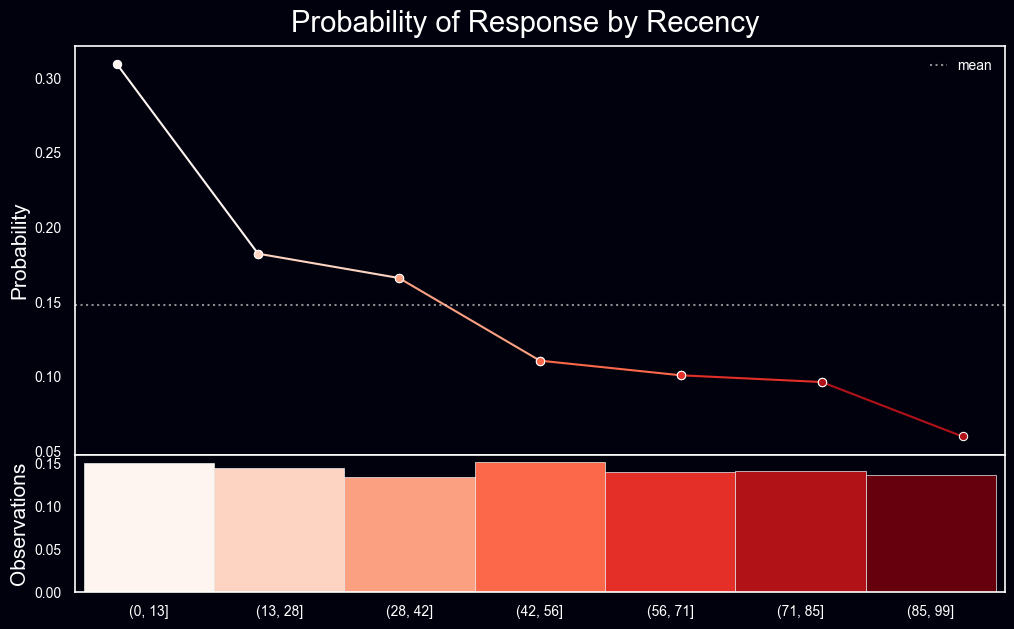

In [365]:
plot_prob_progression(df['Recency'],
                      df['Response'],
                      x_intervals=7, use_quartiles=True,  mean_line=True,
                      title='Probability of Response by Recency')

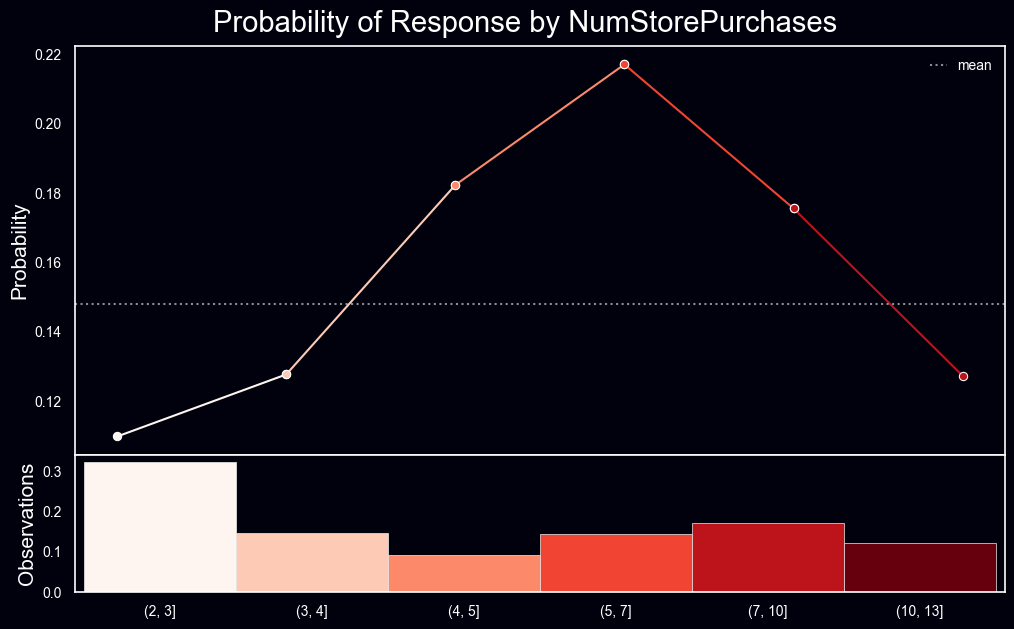

In [378]:
plot_prob_progression(df['NumStorePurchases'],
                      df['Response'],
                      x_intervals=6, use_quartiles=True,  mean_line=True,
                      title='Probability of Response by NumStorePurchases')

In [369]:
def plot_prob_contour_map(x, y, z, x_intervals=7, y_intervals=7, use_quartiles=False, plot_type='contour',\
                          xlabel=None, ylabel=None, title=None, model=None, X_df=None, x_col=None, y_col=None,\
                          diff_to_mean=False, annotate=False):
    x = x.astype(int)
    y = y.astype(int)
    z = z.astype(int)
    if isinstance(x, list): x = np.array(x)
    if isinstance(y, list): y = np.array(y)
    if isinstance(z, list): z = np.array(z)
    if (not isinstance(x, (str, pd.core.series.Series, np.ndarray))) or (not isinstance(y, (str, pd.core.series.Series, np.ndarray))) or (not isinstance(z, (pd.core.series.Series, np.ndarray))):
        raise Exception("x, y and z must be either lists, pandas series or numpy arrays. x and y can be strings when dataset is provided seperately")
    if (isinstance(x, (pd.core.series.Series, np.ndarray)) and (len(x.shape) != 1)) or ((isinstance(y, (pd.core.series.Series, np.ndarray))) and (len(y.shape) != 1)) or (len(z.shape) != 1):
        raise Exception("x, y and z must have a single dimension")
    if (isinstance(x_intervals, (int)) and (x_intervals < 2)) or (isinstance(x_intervals, (list, np.ndarray)) and (len(x_intervals) < 2)) or (isinstance(y_intervals, (int)) and (y_intervals < 2)) or (isinstance(y_intervals, (list, np.ndarray)) and (len(y_intervals) < 2)):
        raise Exception("there must be at least two intervals to contour")
    if not np.isin(z.dtype, [int, float, 'int8', 'int16', 'int32', 'float16', 'float32']):
        raise Exception("z dimension must be a list, pandas series or numpy array of integers or floats")
    if max(z) == min(z):
        raise Exception("z dimension must have at least two values")
    elif len(np.unique(z)) == 2 and ((max(z) != 1) or (min(z) != 0)):
        raise Exception("z dimension if has two values must have a max of exactly 1 and min of exactly zero")
    elif len(np.unique(z)) > 2 and ((max(z) <= 1) or (min(z) >= 0)):
        raise Exception("z dimension if has more than two values must have range between between 0-1")
    x_use_continuous_bins = (model is not None) and (isinstance(x_intervals, (list, np.ndarray)))
    y_use_continuous_bins = (model is not None) and (isinstance(y_intervals, (list, np.ndarray)))
    x, x_bins = discretize(x, x_intervals, use_quartiles, x_use_continuous_bins)
    y, y_bins = discretize(y, y_intervals, use_quartiles, y_use_continuous_bins)
    x_range = [*range(len(x_bins))]
    #if isinstance(y_intervals, (int)):
    y_range = [*range(len(y_bins))]
    #else:
    #y_range = y_intervals
    x_grid, y_grid = np.meshgrid(x_range, y_range)
    positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
    plot_df = pd.DataFrame(positions.T, columns=['x', 'y'])
    
    if (model is not None) and (X_df is not None) and (x_col is not None) and (y_col is not None):
        preds = model.predict(X_df).squeeze()
        if len(np.unique(preds)) <= 2:
            preds = model.predict_proba(X_df)[:,1]
        x_, _ = discretize(X_df[x_col], x_intervals, use_quartiles, x_use_continuous_bins)
        y_, _ = discretize(X_df[y_col], y_intervals, use_quartiles, y_use_continuous_bins)
        xyz_df = pd.DataFrame({'x':x_, 'y':y_, 'z':preds})
    else:
        xyz_df = pd.DataFrame({'x':x,'y':y,'z':z})
    probs_df = xyz_df.groupby(['x','y']).mean().reset_index()        
    probs_df = pd.merge(plot_df, probs_df, how='left', on=['x','y']).fillna(0)
    if diff_to_mean:
        expected_value = xyz_df.z.mean()
        probs_df['z'] = probs_df['z'] - expected_value
        cmap = plt.cm.RdYlBu
    else:
        cmap = plt.cm.viridis
    grid_probs = np.reshape(probs_df.z.to_numpy(), x_grid.shape)

    x_bin_cnt = len(x_bins)
    y_bin_cnt = len(y_bins)
    fig, (ax_top, ax_bottom) = plt.subplots(2, 2, figsize=(12,9),\
                                   gridspec_kw={'height_ratios': [1, 7], 'width_ratios': [6, 1]})
    if title is not None:
        fig.suptitle(title, fontsize=21)
        plt.subplots_adjust(top = 0.95, bottom=0.01, hspace=0.001, wspace=0.001)
    else:
        plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.001, wspace=0.001)

    sns.set_style(None)
    # sns.set_style({'axes.facecolor':'black', 'grid.color': 'white'})
    sns.histplot(xyz_df, x='x', stat='probability', bins=np.arange(x_bin_cnt+1)-0.5, color='dimgray', ax=ax_top[0])
    ax_top[0].set_xticks([])
    ax_top[0].set_yticks([])
    ax_top[0].set_xlabel('')
    ax_top[0].set_ylabel('')
    ax_top[1].set_visible(False)

    if plot_type == 'contour':
        ax_bottom[0].contour(
            x_grid,
            y_grid,
            grid_probs,
            colors=('w',)
        )
        mappable = ax_bottom[0].contourf(
            x_grid,
            y_grid,
            grid_probs,
            cmap=cmap
        ) 
    else:
        mappable = ax_bottom[0].imshow(grid_probs, cmap=plt.cm.viridis,\
                                      interpolation='nearest', aspect='auto')
        if annotate:
            for i in range(y_bin_cnt):
                for j in range(x_bin_cnt):
                    text = ax_bottom[0].text(j, i, "{:.1%}".format(grid_probs[i, j]), fontsize=16,
                                             ha="center", va="center", color="w")
            ax_bottom[0].grid(False)
            
    ax_bottom[0].xaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
    ax_bottom[0].set_xticklabels([''] + list(x_bins))
    ax_bottom[0].yaxis.set_major_locator(plticker.MultipleLocator(base=1.0))
    ax_bottom[0].set_yticklabels([''] + list(y_bins))
    #ax_bottom[0].margins(x=0.04, y=0.04)

    if xlabel is not None:
        ax_bottom[0].set_xlabel(xlabel, fontsize=15)
        
    if ylabel is not None:
        ax_bottom[0].set_ylabel(ylabel, fontsize=15)

    cbar = plt.colorbar(mappable, ax=ax_bottom[1])
    cbar.ax.set_ylabel('Probability', fontsize=13)
    cbar.ax.tick_params(labelsize=11)

    sns.histplot(xyz_df, x='x', stat='probability', bins=np.arange(x_bin_cnt+1)-0.5, color='dimgray', ax=ax_top[0])
    ax_bottom[1].set_xticks([])
    ax_bottom[1].set_yticks([])
    ax_bottom[1].set_xlabel('')
    ax_bottom[1].set_ylabel('')
    sns.set_style(None)

    plt.show()

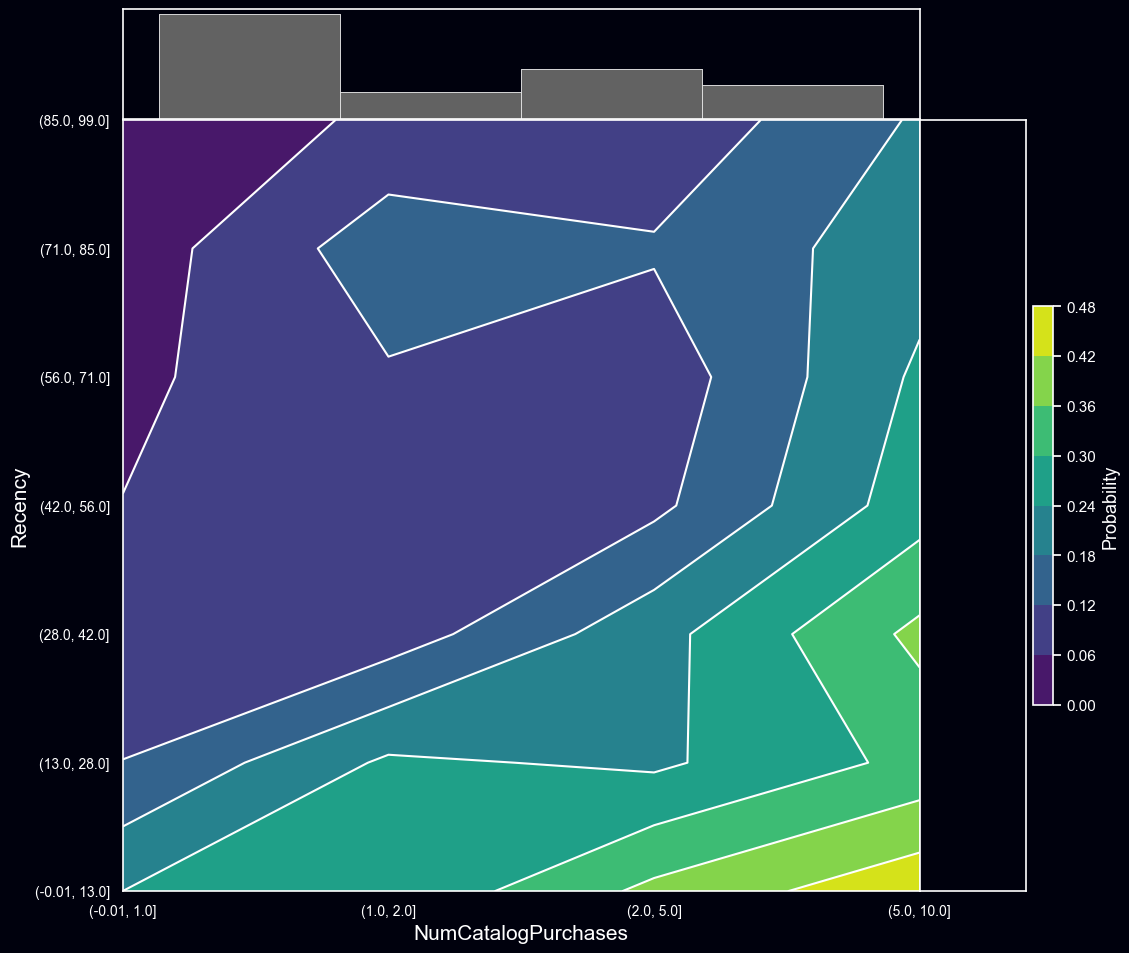

In [372]:
plot_prob_contour_map(df.NumCatalogPurchases, df.Recency, df.Response, use_quartiles=True, x_intervals=5, y_intervals=7, xlabel='NumCatalogPurchases', ylabel='Recency')

In [46]:
%%R -i df

r_df <- df